### Дисклеймер: в этой тетрадке смотреть только ML часть (ниже)

# Чем мы занимаемся ?

## 1. Данные 

Мы выбрали данные о поездках на такси в Нью Йорке, анализировать мы будем жёлтые такси, которые ездят по Манхеттену. В нашей работе мы будем анализировать чаевые, мы будем смотреть на то были ли они или нет, и попробуем создать модель, которая будет предсказывать их наличие или отсутствие, также планируем сделатьмодель которая будет предсказывать величину самих чаевых.

In [1]:
import pandas as pd

import numpy as np 

import scipy.stats as sts

import seaborn as sns

import matplotlib.pyplot as plt 

import pyarrow.parquet as pq

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_zones = pd.read_csv('taxi+_zone_lookup.csv')
df_zones.head(70)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
65,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
66,67,Brooklyn,Dyker Heights,Boro Zone
67,68,Manhattan,East Chelsea,Yellow Zone
68,69,Bronx,East Concourse/Concourse Village,Boro Zone


In [4]:
df_weather_june = pd.read_csv('New York City,USA 2022-06-01 to 2022-06-30.csv')
df_weather_june

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2022-06-01T00:00:00,19.9,19.9,15.6,75.86,0.0,0,NaN,0,...,1014.2,29.3,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
1,"New York City,USA",2022-06-01T01:00:00,19.3,19.3,15.5,78.97,0.0,0,NaN,0,...,1014.0,0.9,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
2,"New York City,USA",2022-06-01T02:00:00,18.3,18.3,14.3,77.59,0.0,0,NaN,0,...,1014.6,29.7,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
3,"New York City,USA",2022-06-01T03:00:00,17.2,17.2,13.8,80.53,0.0,0,NaN,0,...,1014.9,89.1,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
4,"New York City,USA",2022-06-01T04:00:00,16.7,16.7,13.3,80.48,0.0,0,NaN,0,...,1014.8,99.0,16.0,0,NaN,0,10,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"New York City,USA",2022-06-30T19:00:00,27.8,28.0,15.6,47.20,0.0,0,NaN,0,...,1020.3,0.8,16.0,105,0.4,1,10,Clear,clear-day,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
716,"New York City,USA",2022-06-30T20:00:00,25.7,25.7,17.0,58.53,0.0,0,NaN,0,...,1020.3,0.4,16.0,18,0.1,0,10,Clear,clear-day,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
717,"New York City,USA",2022-06-30T21:00:00,25.0,25.0,18.2,65.88,0.0,0,NaN,0,...,1020.3,0.4,16.0,8,0.0,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
718,"New York City,USA",2022-06-30T22:00:00,25.0,25.0,18.3,66.30,0.0,0,NaN,0,...,1020.5,0.4,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."


In [5]:
df_weather_june['datetime'] = pd.to_datetime(df_weather_june['datetime'])

In [6]:
df_weather_june['conditions'].value_counts()

Clear                     311
Partially cloudy          204
Overcast                  132
Rain, Overcast             49
Rain, Partially cloudy     14
Rain                       10
Name: conditions, dtype: int64

In [7]:
df_weather_june['conditions_bin'] = df_weather_june['conditions'].str.contains('Rain').astype(int)

In [8]:
df_weather_june['conditions_bin'].sum()

73

In [9]:
df_weather_december = pd.read_csv('new york 2022-12-01 to 2022-12-31.csv')
df_weather_december

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york,2022-12-01T00:00:00,5.2,0.8,-5.6,45.55,0.000,0,NaN,0.0,...,1012.0,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
1,new york,2022-12-01T01:00:00,4.5,-0.2,-5.8,47.16,0.000,0,NaN,0.0,...,1012.9,97.0,16.0,0,NaN,0,10,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,new york,2022-12-01T02:00:00,3.6,-0.8,-6.6,47.03,0.000,0,NaN,0.0,...,1013.9,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
3,new york,2022-12-01T03:00:00,3.1,-1.0,-7.3,46.27,0.000,0,NaN,0.0,...,1015.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
4,new york,2022-12-01T04:00:00,3.0,-1.3,-8.3,43.33,0.000,0,NaN,0.0,...,1016.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,new york,2022-12-31T19:00:00,9.3,9.3,8.1,92.38,0.000,0,NaN,0.0,...,1010.8,100.0,1.5,223,0.8,0,10,Overcast,cloudy,"72505394728,KLGA,D2180,72503014732"
740,new york,2022-12-31T20:00:00,9.4,9.4,8.8,95.77,0.671,100,rain,0.0,...,1009.8,100.0,2.5,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
741,new york,2022-12-31T21:00:00,11.6,11.6,10.5,92.71,1.034,100,rain,0.0,...,1008.6,100.0,4.7,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
742,new york,2022-12-31T22:00:00,11.2,11.2,10.7,96.73,2.856,100,rain,0.0,...,1008.6,100.0,3.7,227,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"


In [10]:
df_weather_december['datetime'] = pd.to_datetime(df_weather_december['datetime'])

In [11]:
df_weather_december

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york,2022-12-01 00:00:00,5.2,0.8,-5.6,45.55,0.000,0,NaN,0.0,...,1012.0,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
1,new york,2022-12-01 01:00:00,4.5,-0.2,-5.8,47.16,0.000,0,NaN,0.0,...,1012.9,97.0,16.0,0,NaN,0,10,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,new york,2022-12-01 02:00:00,3.6,-0.8,-6.6,47.03,0.000,0,NaN,0.0,...,1013.9,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
3,new york,2022-12-01 03:00:00,3.1,-1.0,-7.3,46.27,0.000,0,NaN,0.0,...,1015.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
4,new york,2022-12-01 04:00:00,3.0,-1.3,-8.3,43.33,0.000,0,NaN,0.0,...,1016.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,new york,2022-12-31 19:00:00,9.3,9.3,8.1,92.38,0.000,0,NaN,0.0,...,1010.8,100.0,1.5,223,0.8,0,10,Overcast,cloudy,"72505394728,KLGA,D2180,72503014732"
740,new york,2022-12-31 20:00:00,9.4,9.4,8.8,95.77,0.671,100,rain,0.0,...,1009.8,100.0,2.5,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
741,new york,2022-12-31 21:00:00,11.6,11.6,10.5,92.71,1.034,100,rain,0.0,...,1008.6,100.0,4.7,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
742,new york,2022-12-31 22:00:00,11.2,11.2,10.7,96.73,2.856,100,rain,0.0,...,1008.6,100.0,3.7,227,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"


In [12]:
df_weather_december['conditions'].value_counts()

Clear                   317
Partially cloudy        184
Overcast                140
Rain, Overcast           96
Snow, Rain, Overcast      7
Name: conditions, dtype: int64

In [13]:
df_weather_december['conditions_bin'] = df_weather_december['conditions'].str.contains('Rain').astype(int)

In [14]:
df_weather_december['conditions_bin'].sum()

103

In [15]:
df_december = pq.read_table('yellow_tripdata_2022-12.parquet')
df_december = df_december.to_pandas()

In [16]:
df_december

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.00,0.5,8.21,0.0,1.0,49.26,NaN,NaN
3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.00,0.5,0.00,0.0,1.0,30.23,NaN,NaN
3399546,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.00,0.5,9.85,0.0,1.0,59.08,NaN,NaN
3399547,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.00,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [17]:
df_december['tips_bin'] = np.where(df_december['tip_amount'] > 0, 1, 0)

In [18]:
df_december

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,1
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,0
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,1
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,0
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.00,0.5,8.21,0.0,1.0,49.26,NaN,NaN,1
3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.00,0.5,0.00,0.0,1.0,30.23,NaN,NaN,0
3399546,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.00,0.5,9.85,0.0,1.0,59.08,NaN,NaN,1
3399547,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.00,0.5,0.00,0.0,1.0,16.74,NaN,NaN,0


In [19]:
df_december['airport_bin'] = np.where(df_december['airport_fee'] > 0, 1, 0)

In [20]:
df_december

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,...,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,1,0
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,...,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,0,1
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,...,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,1,0
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,...,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,0,0
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,...,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,...,0.00,0.5,8.21,0.0,1.0,49.26,NaN,NaN,1,0
3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,...,0.00,0.5,0.00,0.0,1.0,30.23,NaN,NaN,0,0
3399546,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,...,0.00,0.5,9.85,0.0,1.0,59.08,NaN,NaN,1,0
3399547,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,...,0.00,0.5,0.00,0.0,1.0,16.74,NaN,NaN,0,0


In [21]:
df_december[(df_december['payment_type'] == 3) | (df_december['payment_type'] == 4) | (df_december['payment_type'] == 5) | (df_december['payment_type'] == 6)]['tips_bin'].value_counts()

0    57849
1      568
Name: tips_bin, dtype: int64

In [22]:
df_december[df_december['payment_type'] == 2]['tips_bin'].value_counts()

0    660712
1       147
Name: tips_bin, dtype: int64

In [23]:
med_d = df_december['passenger_count'].median()
med_d

1.0

In [24]:
df_december['passenger_count'].fillna(med_d, inplace=True)

In [25]:
df_december['pickup_hour'] = df_december['tpep_pickup_datetime'].dt.hour

In [26]:
df_december['is_weekend'] = df_december['tpep_pickup_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

In [27]:
start_date = pd.Timestamp('2022-12-01 00:00:00')
end_date = pd.Timestamp('2022-12-31 23:59:59')
df_december = df_december[(start_date <= df_december['tpep_pickup_datetime']) & (df_december['tpep_pickup_datetime'] <= end_date)]

In [28]:
df_december = df_december.sort_values(by='tpep_pickup_datetime', ascending=True)

In [29]:
df_december_mit_weather = pd.merge_asof(df_december, df_weather_december[['datetime', 'temp', 'conditions_bin']], left_on='tpep_pickup_datetime', right_on='datetime')

In [30]:
df_december_mit_weather.drop('datetime', axis=1,  inplace=True)

In [31]:
df_december_mit_weather

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend,temp,conditions_bin
0,2,2022-12-01 00:00:00,2022-12-01 00:09:48,1.0,1.11,1.0,N,230,161,1,...,0.3,13.56,2.5,0.00,1,0,0,0,5.2,0
1,2,2022-12-01 00:00:00,2022-12-01 00:17:00,1.0,6.80,NaN,None,87,262,0,...,0.3,39.62,NaN,NaN,1,0,0,0,5.2,0
2,2,2022-12-01 00:00:01,2022-12-01 00:28:59,2.0,17.46,2.0,N,132,48,2,...,0.3,63.10,2.5,1.25,0,1,0,0,5.2,0
3,2,2022-12-01 00:00:03,2022-12-01 00:14:33,1.0,8.81,1.0,N,138,140,1,...,0.3,36.61,2.5,1.25,1,1,0,0,5.2,0
4,2,2022-12-01 00:00:06,2022-12-01 00:07:35,1.0,1.70,1.0,N,161,239,1,...,0.3,12.80,2.5,0.00,1,0,0,0,5.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399498,2,2022-12-31 23:59:39,2023-01-01 00:04:59,1.0,0.56,1.0,N,164,186,4,...,1.0,11.50,2.5,0.00,0,0,23,1,12.7,1
3399499,2,2022-12-31 23:59:39,2023-01-01 00:04:59,1.0,0.56,1.0,N,164,186,4,...,-1.0,-11.50,-2.5,0.00,0,0,23,1,12.7,1
3399500,2,2022-12-31 23:59:44,2023-01-01 00:07:19,2.0,1.30,1.0,N,79,68,1,...,1.0,14.30,2.5,0.00,0,0,23,1,12.7,1
3399501,2,2022-12-31 23:59:56,2023-01-01 00:13:54,1.0,2.51,1.0,N,237,50,1,...,1.0,26.78,2.5,0.00,1,0,23,1,12.7,1


In [32]:
df_december_mit_weather = df_december_mit_weather[(df_december_mit_weather['payment_type'] == 1) | (df_december_mit_weather['payment_type'] == 2)]

In [33]:
df_december_mit_weather

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend,temp,conditions_bin
0,2,2022-12-01 00:00:00,2022-12-01 00:09:48,1.0,1.11,1.0,N,230,161,1,...,0.3,13.56,2.5,0.00,1,0,0,0,5.2,0
2,2,2022-12-01 00:00:01,2022-12-01 00:28:59,2.0,17.46,2.0,N,132,48,2,...,0.3,63.10,2.5,1.25,0,1,0,0,5.2,0
3,2,2022-12-01 00:00:03,2022-12-01 00:14:33,1.0,8.81,1.0,N,138,140,1,...,0.3,36.61,2.5,1.25,1,1,0,0,5.2,0
4,2,2022-12-01 00:00:06,2022-12-01 00:07:35,1.0,1.70,1.0,N,161,239,1,...,0.3,12.80,2.5,0.00,1,0,0,0,5.2,0
5,2,2022-12-01 00:00:07,2022-12-01 00:11:38,2.0,3.67,1.0,N,48,41,1,...,0.3,19.56,2.5,0.00,1,0,0,0,5.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399496,2,2022-12-31 23:59:34,2023-01-01 00:26:20,1.0,8.47,1.0,N,166,261,2,...,1.0,41.60,2.5,0.00,0,0,23,1,12.7,1
3399497,2,2022-12-31 23:59:36,2023-01-01 00:03:49,1.0,1.20,1.0,N,137,107,1,...,1.0,12.20,2.5,0.00,0,0,23,1,12.7,1
3399500,2,2022-12-31 23:59:44,2023-01-01 00:07:19,2.0,1.30,1.0,N,79,68,1,...,1.0,14.30,2.5,0.00,0,0,23,1,12.7,1
3399501,2,2022-12-31 23:59:56,2023-01-01 00:13:54,1.0,2.51,1.0,N,237,50,1,...,1.0,26.78,2.5,0.00,1,0,23,1,12.7,1


In [34]:
df_december_mit_weather['payment_type'] = np.where(df_december_mit_weather['payment_type'] == 1, 1, 0)

In [35]:
df_december_mit_weather_zone = pd.merge(df_december_mit_weather, df_zones[['LocationID', 'Zone']], how='left', left_on='PULocationID', right_on='LocationID')

In [36]:
df_december_mit_weather_zone.drop('LocationID', axis=1, inplace=True)

In [37]:
df_december_mit_weather_zone

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend,temp,conditions_bin,Zone
0,2,2022-12-01 00:00:00,2022-12-01 00:09:48,1.0,1.11,1.0,N,230,161,1,...,13.56,2.5,0.00,1,0,0,0,5.2,0,Times Sq/Theatre District
1,2,2022-12-01 00:00:01,2022-12-01 00:28:59,2.0,17.46,2.0,N,132,48,0,...,63.10,2.5,1.25,0,1,0,0,5.2,0,JFK Airport
2,2,2022-12-01 00:00:03,2022-12-01 00:14:33,1.0,8.81,1.0,N,138,140,1,...,36.61,2.5,1.25,1,1,0,0,5.2,0,LaGuardia Airport
3,2,2022-12-01 00:00:06,2022-12-01 00:07:35,1.0,1.70,1.0,N,161,239,1,...,12.80,2.5,0.00,1,0,0,0,5.2,0,Midtown Center
4,2,2022-12-01 00:00:07,2022-12-01 00:11:38,2.0,3.67,1.0,N,48,41,1,...,19.56,2.5,0.00,1,0,0,0,5.2,0,Clinton East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214618,2,2022-12-31 23:59:34,2023-01-01 00:26:20,1.0,8.47,1.0,N,166,261,0,...,41.60,2.5,0.00,0,0,23,1,12.7,1,Morningside Heights
3214619,2,2022-12-31 23:59:36,2023-01-01 00:03:49,1.0,1.20,1.0,N,137,107,1,...,12.20,2.5,0.00,0,0,23,1,12.7,1,Kips Bay
3214620,2,2022-12-31 23:59:44,2023-01-01 00:07:19,2.0,1.30,1.0,N,79,68,1,...,14.30,2.5,0.00,0,0,23,1,12.7,1,East Village
3214621,2,2022-12-31 23:59:56,2023-01-01 00:13:54,1.0,2.51,1.0,N,237,50,1,...,26.78,2.5,0.00,1,0,23,1,12.7,1,Upper East Side South


In [38]:
df_june =  pq.read_table('yellow_tripdata_2022-06.parquet')
df_june = df_june.to_pandas()

In [39]:
df_june['tips_bin'] = np.where(df_june['tip_amount'] > 0, 1, 0)

In [40]:
df_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.00,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00,1
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.00,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00,0
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.00,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25,1
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.00,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25,0
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.00,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30 23:45:51,2022-06-30 23:51:48,NaN,0.00,NaN,None,148,256,0,9.20,0.50,0.5,0.00,0.00,0.3,15.00,NaN,NaN,0
3558120,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,NaN,None,79,262,0,18.86,0.00,0.5,5.19,0.00,0.3,27.35,NaN,NaN,1
3558121,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,NaN,None,164,79,0,10.03,0.00,0.5,3.10,0.00,0.3,16.43,NaN,NaN,1
3558122,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,NaN,None,211,239,0,24.34,0.00,0.5,0.00,0.00,0.3,27.64,NaN,NaN,0


In [41]:
df_june['airport_bin'] = np.where(df_june['airport_fee'] > 0, 1, 0)

In [42]:
df_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,...,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00,1,0
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,...,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00,0,0
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,...,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25,1,1
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,...,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25,0,1
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,...,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30 23:45:51,2022-06-30 23:51:48,NaN,0.00,NaN,None,148,256,0,...,0.50,0.5,0.00,0.00,0.3,15.00,NaN,NaN,0,0
3558120,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,NaN,None,79,262,0,...,0.00,0.5,5.19,0.00,0.3,27.35,NaN,NaN,1,0
3558121,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,NaN,None,164,79,0,...,0.00,0.5,3.10,0.00,0.3,16.43,NaN,NaN,1,0
3558122,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,NaN,None,211,239,0,...,0.00,0.5,0.00,0.00,0.3,27.64,NaN,NaN,0,0


In [43]:
df_june['improvement_surcharge'].value_counts()

 0.3    3534019
-0.3      22671
 0.0       1434
Name: improvement_surcharge, dtype: int64

In [44]:
df_june[(df_june['payment_type'] == 3) | (df_june['payment_type'] == 4) | (df_june['payment_type'] == 5) | (df_june['payment_type'] == 6)]['tips_bin'].value_counts()

0    32838
1      271
Name: tips_bin, dtype: int64

In [45]:
med_j = df_june['passenger_count'].median()
med_j

1.0

In [46]:
df_june['passenger_count'].fillna(med_j, inplace=True)

In [47]:
df_june['pickup_hour'] = df_june['tpep_pickup_datetime'].dt.hour

In [48]:
df_june['is_weekend'] = df_june['tpep_pickup_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

In [49]:
start_date = pd.Timestamp('2022-06-01 00:00:00')
end_date = pd.Timestamp('2022-06-30 23:59:59')
df_june = df_june[(start_date <= df_june['tpep_pickup_datetime']) & (df_june['tpep_pickup_datetime'] <= end_date)]

In [50]:
df_june = df_june.sort_values(by='tpep_pickup_datetime', ascending=True)

In [51]:
df_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend
50914,2,2022-06-01 00:00:00,2022-06-01 14:28:07,1.0,0.38,1.0,N,140,170,2,...,0.00,0.00,0.3,7.80,2.5,0.00,0,0,0,0
3425712,2,2022-06-01 00:00:00,2022-06-01 00:14:00,1.0,3.15,NaN,None,144,256,0,...,1.72,0.00,0.3,17.16,NaN,NaN,1,0,0,0
1747,2,2022-06-01 00:00:01,2022-06-01 00:16:09,3.0,9.53,1.0,N,132,39,1,...,5.66,0.00,0.3,35.21,0.0,1.25,1,1,0,0
234,1,2022-06-01 00:00:01,2022-06-01 00:07:42,1.0,1.40,1.0,N,239,263,1,...,1.13,0.00,0.3,12.43,2.5,0.00,1,0,0,0
410,2,2022-06-01 00:00:07,2022-06-01 00:24:07,1.0,10.55,1.0,N,144,133,1,...,10.46,6.55,0.3,52.31,2.5,0.00,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422070,2,2022-06-30 23:59:55,2022-07-01 00:08:49,1.0,1.80,1.0,N,114,186,1,...,1.00,0.00,0.3,13.30,2.5,0.00,1,0,23,0
3422332,2,2022-06-30 23:59:55,2022-07-01 00:48:44,1.0,13.93,1.0,N,264,219,2,...,0.00,0.00,0.3,50.05,0.0,1.25,0,1,23,0
3422476,1,2022-06-30 23:59:57,2022-07-01 00:19:05,2.0,6.00,1.0,N,234,195,1,...,4.65,0.00,0.3,27.95,2.5,0.00,1,0,23,0
3422325,1,2022-06-30 23:59:58,2022-07-01 00:34:23,2.0,19.30,2.0,N,132,87,2,...,0.00,0.00,0.3,56.55,2.5,1.25,0,1,23,0


In [52]:
df_june_mit_weather = pd.merge_asof(df_june, df_weather_june[['datetime', 'temp', 'conditions_bin']], left_on='tpep_pickup_datetime', right_on='datetime')

In [53]:
df_june_mit_weather.drop('datetime', axis=1, inplace=True)

In [54]:
df_june_mit_weather = df_june_mit_weather[(df_june_mit_weather['payment_type'] == 1) | (df_june_mit_weather['payment_type'] == 2)]

In [55]:
df_june_mit_weather

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend,temp,conditions_bin
0,2,2022-06-01 00:00:00,2022-06-01 14:28:07,1.0,0.38,1.0,N,140,170,2,...,0.3,7.80,2.5,0.00,0,0,0,0,19.9,0
2,2,2022-06-01 00:00:01,2022-06-01 00:16:09,3.0,9.53,1.0,N,132,39,1,...,0.3,35.21,0.0,1.25,1,1,0,0,19.9,0
3,1,2022-06-01 00:00:01,2022-06-01 00:07:42,1.0,1.40,1.0,N,239,263,1,...,0.3,12.43,2.5,0.00,1,0,0,0,19.9,0
4,2,2022-06-01 00:00:07,2022-06-01 00:24:07,1.0,10.55,1.0,N,144,133,1,...,0.3,52.31,2.5,0.00,1,0,0,0,19.9,0
5,1,2022-06-01 00:00:09,2022-06-01 00:21:40,1.0,4.90,1.0,N,148,142,1,...,0.3,21.30,2.5,0.00,0,0,0,0,19.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557606,2,2022-06-30 23:59:54,2022-07-01 00:06:51,2.0,1.37,1.0,N,164,161,1,...,0.3,10.30,2.5,0.00,0,0,23,0,25.0,0
3557607,2,2022-06-30 23:59:55,2022-07-01 00:08:49,1.0,1.80,1.0,N,114,186,1,...,0.3,13.30,2.5,0.00,1,0,23,0,25.0,0
3557608,2,2022-06-30 23:59:55,2022-07-01 00:48:44,1.0,13.93,1.0,N,264,219,2,...,0.3,50.05,0.0,1.25,0,1,23,0,25.0,0
3557609,1,2022-06-30 23:59:57,2022-07-01 00:19:05,2.0,6.00,1.0,N,234,195,1,...,0.3,27.95,2.5,0.00,1,0,23,0,25.0,0


In [56]:
df_june_mit_weather['payment_type'] = np.where(df_june_mit_weather['payment_type'] == 1, 1, 0)

In [57]:
df_june_mit_weather_zone = pd.merge(df_june_mit_weather, df_zones[['LocationID', 'Zone']], how='left', left_on='PULocationID', right_on='LocationID')

In [58]:
df_june_mit_weather_zone.drop('LocationID', axis=1, inplace=True)

## 2. Features

Итак говоря о признаках, важно определить какие нам будут нужны в будущем а какие нет, но для начала пройдёмся по всем. 

- VendorID - Указывает провайдера (две компании 1=  Creative Mobile Technologies, LLC 2= VeriFone Inc)

- tpep_pickup_datetime - Дата и время начала поездки 

- tpep_dropoff_datetime - Дата и время окончания поездки 

- Passenger_count - Количество пассажиров указываемое водителем 

- Trip_distance - Дистанция поездки измеренная таксометром

- PULocationID - Место начала поездки 

- DOLocationID -  Пункт назначения 

- RateCodeID - Код ставки применяемой к поездке (1= Standard rate, 2= JFK (аэропорт кеннеди), 3= Newark, 4= Nassau or Westchester, 5= Negotiated fare, 6= Group ride)

- Store_and_fwd_flag - 

- Payment_type - Тип опалаты (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided Trip)

- Fare_amount - Стоимость поездки рассчитанная по времени и расстоянию

- Extra - Сборы за доп услуги 0.5 долларов В час пик и 1 доллар в ночь 

- MTA_tax - Налог MTA в размере 0,50 доллара США, который автоматически взимается в зависимости от используемой учетной ставки

- Improvement_surcharge - За поездки при сбросе флага взимается дополнительная плата за улучшение в размере 0,30 доллара США. Надбавка за благоустройство начала взиматься в 2015 году.

- Tip_amount - Чаевые 

- Tolls_amount - пошлины 

- Total_amount - сколько всего заплатил пассажир, не включает наличные чаевые 

- Congestion_Surcharge - Общая сумма, взимаемая в поездке за дополнительную плату за пробки в Нью-Йорке.

- Airport_fee - 1,25 доллара за приезд такси только в аэропортах Ла Гуардиа и Джона Ф. Кеннеди

# 3. Гипотезы

- Как правило, в декабре выплачиваются годовые бонусы, поэтому у населения больше денег. Поэтому мы предполагаем что в декабре чаевые таксистам выше, чем в другие месяцы. Для этого мы проверим гипотезу о равенстве математических ожиданий в декабре и июне. Соответственно H0: мат ожидание в декабре = мат ожиданию в июне. H1: мат ожидания неравны. Также стоит и проверить такие же гипотезы но односторонние. Так как распределения чаевых и истинные параметры нам неизвестны мы будем использовать статистику для случайных величин с неизвестными парамтерами. проверять гипотезы му будем на уровнях значимости: 0.01, 0.05, 0.1

In [59]:
def tips_diff_two_sided(x, y): # Это нам не надо, нужно удалить 
    n = np.size(x)
    m = np.size(y)
    mu0 = 0 
    sigma_x = np.var(x, ddof=1)
    sigma_y = np.var(y, ddof=1)
    z_stat = (np.mean(x) - np.mean(y) - mu0) / np.sqrt((sigma_x / n) + (sigma_y / m))
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_left_crit = -1 * sts.norm.ppf(1-alpha/2)
        z_right_crit = sts.norm.ppf(1-alpha/2)
        if (z_stat > z_left_crit) & (z_stat < z_right_crit):
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else:
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')

In [60]:
tips_diff_two_sided(df_december['tip_amount'].values, df_june['tip_amount'].values)

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


In [61]:
def tips_diff_one_sided_right(x, y): # а тут верно H0: в декабре платят больше или также как в июне H1: в декабре платят меньше
    n = np.size(x)
    m = np.size(y)
    mu0 = 0 
    sigma_x = np.var(x, ddof=1)
    sigma_y = np.var(y, ddof=1)
    z_stat = (np.mean(x) - np.mean(y) - mu0) / np.sqrt((sigma_x / n) + (sigma_y / m))
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_left_crit = -1 * sts.norm.ppf(1-alpha)
        if  (z_stat > z_left_crit):
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else:
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')
    return z_stat

In [62]:
tips_diff_one_sided_right(df_december['tip_amount'].values, df_june['tip_amount'].values)

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


1.2716452827782707

**Вывод:** Из данной гипотезы мы понимаем, что наше предположение о том что в декабре платят чаевых больше, что важно наша гипотеза не отвергается на всех заданных уровнях значимости. Таким образом, можно отверждать, что в декабре платят больше чаевых

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


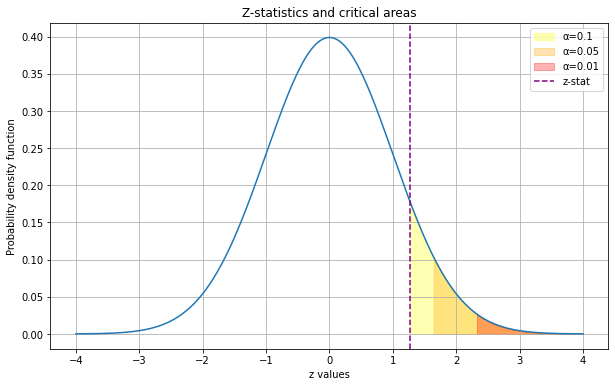

In [63]:
# Вызываем функцию для получения z-статистики
z_stat = tips_diff_one_sided_right(df_december['tip_amount'].values, df_june['tip_amount'].values)

# Рисуем график
def plot_z_stat_one_sided(z_stat):
    z_values = np.linspace(-4, 4, 400)
    normal_dist = sts.norm.pdf(z_values, 0, 1)

    plt.figure(figsize=(10, 6))
    plt.plot(z_values, normal_dist)

    alphas = [0.1, 0.05, 0.01]  # Изменен порядок значений alphas
    colors = ['yellow', 'orange', 'red']  # Изменен порядок значений colors
    for alpha, color in zip(alphas, colors):
        z_right_crit = sts.norm.ppf(1-alpha)
        critical_area = np.linspace(z_right_crit, 4, 400)
        plt.fill_between(critical_area, sts.norm.pdf(critical_area, 0, 1), color=color, alpha=0.3, label=f'α={alpha}')

    plt.axvline(z_stat, color='purple', linestyle='dashed', linewidth=1.5, label='z-stat')

    plt.legend()
    plt.title('Z-statistics and critical areas')
    plt.xlabel('z values')
    plt.ylabel('Probability density function')
    plt.grid(True)
    plt.show()

# Вызываем функцию отрисовки графика с полученной z-статистикой
plot_z_stat_one_sided(z_stat)


**Вывод:** 

Гипотеза о доле, для проверки данной гипотезы мы ввели в дата фреймы бинарные столбцы, где у нас есть 1 если чаевые больше 0 и 0, если чаевые равны нулю. И теперь мы хотим проверить гипотезу что в каждом из месяцев доля чаевых равна 0.5. Для этого будем использовать критические области. 

In [64]:
def prop_hyp(x):
    p0 = 0.5
    p_hat = np.mean(x)
    n = np.size(x)
    z_stat = ((p_hat - p0) / np.sqrt(p_hat * (1 - p_hat))) * np.sqrt(n)
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit_left = -1 * sts.norm.ppf(1-alpha/2)
        z_crit_right = sts.norm.ppf(1-alpha/2)
        if (z_stat > z_crit_left) & (z_stat < z_crit_right):
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else: 
            print(f'Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости {alpha}')
    return z_stat

In [65]:
prop_hyp(df_december['tips_bin'].values)

Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.1


1076.855030874104

In [66]:
prop_hyp(df_june['tips_bin'].values)

Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.1


1151.6275613412831

**Вывод:** В данной гипотезе мы ставили себе цель проверить являются ли чаевыми случайными (то есть вероятность 0.5 у того что пассажир оставит чаевые). И мы получили занимательные выводы. Получается чаевые оставляют не случайно. Далее мы решили проверить односторонюю гипотезу о том что вероятность чаевых больше чем 0.5 или равна. Пусть кажется что мы проверяем ту же гипотезу, но в действительности мы изначально не предполагали что чаевые не случайны, соответственно теперь мы попытаемся узнать какова вероятность получения чаевых.

In [67]:
def plot_z_stat_and_critical_area_prop(z_stat):
    # Задаем оси
    z_values = np.linspace(-3.5, 3.5, 1000)
    
    # Задаем цвета для каждого уровня значимости
    color_dict = {0.01: 'red', 0.05: 'blue', 0.1: 'green'}
    
    # Рисуем график плотности стандартного нормального распределения
    plt.plot(z_values, sts.norm.pdf(z_values, 0, 1))
    
    # Рисуем критические области и z-статистику для каждого уровня значимости
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit_right = sts.norm.ppf(1-alpha)
        critical_area = np.linspace(z_crit_right, 3.5, 500)
        color = color_dict[alpha]
        plt.fill_between(critical_area, sts.norm.pdf(critical_area, 0, 1), color=color, alpha=0.3, label=f'α={alpha}')
    
    # Построение z-статистики
    plt.axvline(z_stat, color='purple', linestyle='dashed', linewidth=1.5, label='z-stat')
    plt.legend()
    plt.title('Z-statistics and critical areas')
    plt.show()


Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости 0.1


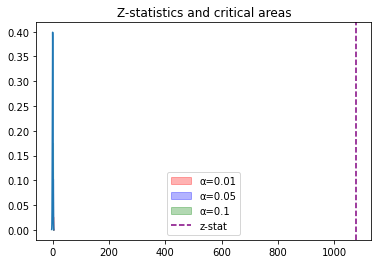

In [68]:
# Вызываем функцию для получения z-статистики
z_stat = prop_hyp(df_december['tips_bin'].values)

# Вызываем функцию отрисовки графика с полученной z-статистикой
plot_z_stat_and_critical_area_prop(z_stat)


**Вывод:** 

А теперь проверим одностороние гипотезы для долей 

Проверяем гипотезу что наша доля чаевых больше или равна 0.5

In [69]:
def prop_hyp_one_sided(x): # Этот стоит оставить
    p0 = 0.5
    p_hat = np.mean(x)
    n = np.size(x)
    z_stat = ((p_hat - p0) / np.sqrt(p_hat * (1 - p_hat))) * np.sqrt(n)
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit_left = -1 * sts.norm.ppf(1-alpha)
        if (z_stat > z_crit_left):
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else: 
            print(f'Нулевая гипиотеза отвергается в пользу альтернативной на уровне значимости {alpha}')
    return z_stat

In [70]:
prop_hyp_one_sided(df_december['tips_bin'].values)

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


1076.855030874104

In [71]:
prop_hyp_one_sided(df_june['tips_bin'].values)

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


1151.6275613412831

**Вывод:** Теперь можно сделать вывод что чаевые оставляют чаще чем не оставляют. Таким образом становится понятно, что это не случайное событие. 

Нулевая гипотеза не отвергается на уровне значимости 0.01
Нулевая гипотеза не отвергается на уровне значимости 0.05
Нулевая гипотеза не отвергается на уровне значимости 0.1


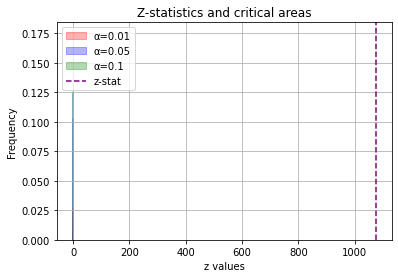

In [72]:
def plot_hist_and_critical_area_prop_one_sided(z_stat):
    z_values = np.linspace(-4, 4, 400)
    color_dict = {0.01: 'red', 0.05: 'blue', 0.1: 'green'}

    # Рисуем гистограмму
    plt.hist(z_values, bins=100, density=True, alpha=0.5)
    
    # Рисуем критические области и z-статистику для каждого уровня значимости
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit_left = -1 * sts.norm.ppf(1-alpha)
        critical_area = np.linspace(-4, z_crit_left, 400)
        plt.fill_between(critical_area, 0, sts.norm.pdf(critical_area), color=color_dict[alpha], alpha=0.3, label=f'α={alpha}')

    # Рисуем z-статистику
    plt.axvline(z_stat, color='purple', linestyle='dashed', linewidth=1.5, label='z-stat')

    plt.legend()
    plt.title('Z-statistics and critical areas')
    plt.xlabel('z values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Пример вызова функции
z_stat = prop_hyp_one_sided(df_december['tips_bin'].values)
plot_hist_and_critical_area_prop_one_sided(z_stat)

Проверим противоположную гипотезу

In [73]:
def prop_hyp_one_sided_v2(x): # Это не надо в принципе 
    p0 = 0.5
    p_hat = np.mean(x)
    n = np.size(x)
    z_stat = ((p_hat - p0) / np.sqrt(p_hat * (1 - p_hat))) * np.sqrt(n)
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit_right = sts.norm.ppf(1-alpha)
        if (z_stat < z_crit_right):
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else: 
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')
    return z_stat

In [74]:
prop_hyp_one_sided_v2(df_december['tips_bin'].values)

Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


1076.855030874104

In [75]:
prop_hyp_one_sided_v2(df_june['tips_bin'].values)

Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


1151.6275613412831

Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


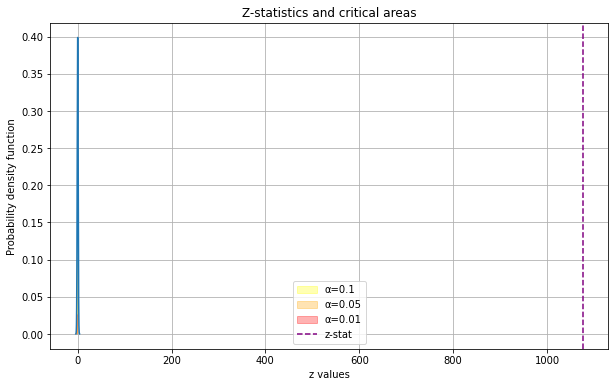

In [76]:
def plot_z_stat_one_sided_v2(z_stat):
    z_values = np.linspace(-4, 4, 400)
    normal_dist = sts.norm.pdf(z_values, 0, 1)

    plt.figure(figsize=(10, 6))
    plt.plot(z_values, normal_dist)

    alphas = [0.1, 0.05, 0.01]  # Изменен порядок значений alphas
    colors = ['yellow', 'orange', 'red']  # Изменен порядок значений colors
    for alpha, color in zip(alphas, colors):
        z_left_crit = sts.norm.ppf(alpha)
        critical_area = np.linspace(-4, z_left_crit, 400)
        plt.fill_between(critical_area, sts.norm.pdf(critical_area, 0, 1), color=color, alpha=0.3, label=f'α={alpha}')

    plt.axvline(z_stat, color='purple', linestyle='dashed', linewidth=1.5, label='z-stat')

    plt.legend()
    plt.title('Z-statistics and critical areas')
    plt.xlabel('z values')
    plt.ylabel('Probability density function')
    plt.grid(True)
    plt.show()
z_stat = prop_hyp_one_sided_v2(df_december['tips_bin'].values)
plot_z_stat_one_sided_v2(z_stat)


**Вывод:** Пусть после проверки одной односторонней гипотезы были очевидны результаты другой я всё равно решил проверить (на всякий случай). Получается, что чаевые люди оставляют в такси больше чем в 50 процентов случаев и это довольно интересный вывод, потому что нам казалось это не совсем очевидным. Также проверка данных гипотез позволяет понять что при машинном обучении, нельзя будет просто разделить выборку без stratify, иначе результаты получатся искажёнными. 

Проверить ещё гипотезы: Разница долей, независимость чаевых от аэропорта, независимость от дождя/снега, можно ещё про дисперсию, но надо подумать (интерпретация такая, что в декабре условно больше отклонения из-за больших доходов) 

Для ML нужно очистить данные и добавить погоду (температура плюс был дождь/снег или нет) 

Теперь интерессно проверить когда таксист вероятнее получит чаевые. Для этого мы будем проверять гипотезу о разности долей. Нулевая гипотеза у нас будет такая что разность долей будет либо равна нулю либо больше нуля (будем вычитать из доли декабря долю июня) альтернатвиная гипотеза будет такая, что в июне доля чаевых больше. 

In [77]:
def prop_diff(x, y):
    px_hat = np.mean(x)
    py_hat = np.mean(y)
    p0 = 0 
    n = np.size(x)
    m = np.size(y)
    z_stat = (px_hat - py_hat - p0) / np.sqrt(((px_hat * (1 - px_hat)) / n) + ((py_hat * (1 - py_hat)) / m))
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        z_crit = -1 * sts.norm.ppf(1-alpha)
        if z_stat > z_crit:
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else:
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')
    return z_stat

In [78]:
prop_diff(df_december['tips_bin'].values, df_june['tips_bin'].values)

Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


-25.765360762669264

**Вывод:** В данной гипотезе мы проверям, в каком месяце чаще дают чаевые, как мы ранее предположили, что в декабре чаевые в среднем выше, чем в июне. Соответственно мы подумали что в декабре пассажиры их также будут чаще оставлять, чем в июне. Однако  после проверки гипотезы, получилось всё совершенно наоборот, в июне чаевые оставляют чаще чем в декабре. В то же время средняя величина выше в декабре. Отсюда можно сделать вывод, что в июне чаевые оставляют чаще, однако в меньшем объёме. 

In [79]:
def plot_z_stat_one_sided_diff(z_stat):
    z_values = np.linspace(-4, 4, 400)
    normal_dist = sts.norm.pdf(z_values, 0, 1)

    plt.figure(figsize=(10, 6))
    plt.plot(z_values, normal_dist)

    alphas = [0.1, 0.05, 0.01]  # Изменен порядок значений alphas
    colors = ['yellow', 'orange', 'red']  # Изменен порядок значений colors
    for alpha, color in zip(alphas, colors):
        z_left_crit = sts.norm.ppf(alpha)
        critical_area = np.linspace(-4, z_left_crit, 400)
        plt.fill_between(critical_area, sts.norm.pdf(critical_area, 0, 1), color=color, alpha=0.3, label=f'α={alpha}')

    plt.axvline(z_stat, color='purple', linestyle='dashed', linewidth=1.5, label='z-stat')

    plt.legend()
    plt.title('Z-statistics and critical areas')
    plt.xlabel('z values')
    plt.ylabel('Probability density function')
    plt.grid(True)
    plt.show()

Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


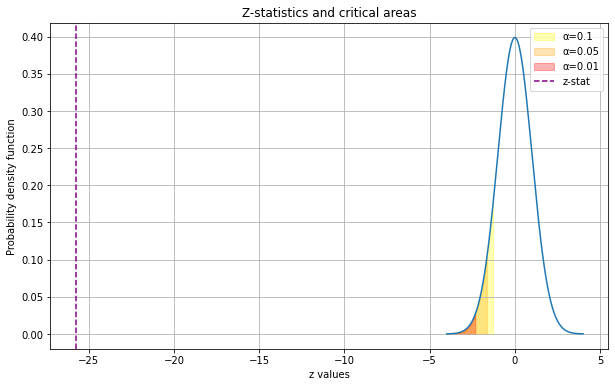

In [80]:
z_stat = prop_diff(df_december['tips_bin'].values, df_june['tips_bin'].values)
plot_z_stat_one_sided_diff(z_stat)


In [81]:
df_december['tips_bin'].mean()

0.752166125460104

In [82]:
df_june['tips_bin'].mean()

0.7605556761108294

Проверим гипотезу о независимости событий: пассажир заплатил чаевые и пассажир ехал или уезжал из аэропорта. Почему мне кажетсся что это имеет смысл, потому что пассажир может дать чаевые водителю за то что тот ему поможет выгрузить из машины чемоданы и соответственно может помочь загрузить их в авто. Проверять гипотезу мы будем с помощью chi2_contingency. 

In [83]:
def airoport_und_tips(x, y):
    contigency_table = pd.crosstab(x, y)
    p_value = sts.chi2_contingency(contigency_table)[1]
    alphas = [0.01, 0.05, 0.1]
    print(f'p_value: {p_value}')
    for alpha in alphas:
        if p_value > alpha: 
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else:
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')

In [84]:
airoport_und_tips(df_december['tips_bin'], df_december['airport_bin'])

p_value: 0.0
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


In [85]:
contigency_table_dec = pd.crosstab(df_december['tips_bin'], df_december['airport_bin'])
contigency_table_dec

airport_bin,0,1
tips_bin,,
0,759684,82828
1,2359861,197130


In [86]:
contigency_table_dec[0][1]

2359861

In [87]:
contigency_table_dec[0]

tips_bin
0     759684
1    2359861
Name: 0, dtype: int64

In [88]:
p_tips_airport_yes = contigency_table_dec[1][1] / contigency_table_dec[1].sum()
p_tips_airport_no = contigency_table_dec[0][1] / contigency_table_dec[0].sum()
print(f'Доля чаевых когда в поездке фигурировал аэропорт: {p_tips_airport_yes}')
print(f'Доля чаевых когда в поездке не фигурировал аэропорт: {p_tips_airport_no}')

Доля чаевых когда в поездке фигурировал аэропорт: 0.7041413354860372
Доля чаевых когда в поездке не фигурировал аэропорт: 0.7564760245484518


In [89]:
airoport_und_tips(df_june['tips_bin'], df_june['airport_bin'])

p_value: 0.0
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


In [90]:
contigency_table_jun = pd.crosstab(df_june['tips_bin'], df_june['airport_bin'])
contigency_table_jun

airport_bin,0,1
tips_bin,,
0,776099,75751
1,2516798,188964


In [91]:
p_tips_airport_yes = contigency_table_jun[1][1] / contigency_table_jun[1].sum()
p_tips_airport_no = contigency_table_jun[0][1] / contigency_table_jun[0].sum()
print(f'Доля чаевых когда в поездке фигурировал аэропорт: {p_tips_airport_yes}')
print(f'Доля чаевых когда в поездке не фигурировал аэропорт: {p_tips_airport_no}')

Доля чаевых когда в поездке фигурировал аэропорт: 0.7138394121980243
Доля чаевых когда в поездке не фигурировал аэропорт: 0.7643111825240814


**Вывод:** Данную гипотезу мы решили проверить предполагая то, что есть некоторые события который могут влиять на чаевые. Например был ли в поездке аэропорт. Мы предположили что между ними есть какая то зависимость. Далее проверили гипотезу на независимость и она отверглась. Далее мы решили понять, каким образом влияет аэропорт на чаевые и в каждом из двух месяцев мы получили одинаковые результаты. В каждом из двух месяцев доля чаевых выше когда аэропорт не фигурировал в поездке. Таким образом мы можем предполагать что аэропорт негативно влияет на вероятность того что пассажир оставит чаевые.  

Гипотеза о независимости чаевых от того идёт ли дождь или нет. Мы проверим данную гипотезу через функцию chi2_contigency

In [92]:
def rain_und_tips(x, y):
    contigency_table = pd.crosstab(x, y)
    p_value = sts.chi2_contingency(contigency_table)[1]
    alphas = [0.01, 0.05, 0.1]
    print(f'p_value: {p_value}')
    for alpha in alphas:
        if p_value > alpha: 
            print(f'Нулевая гипотеза не отвергается на уровне значимости {alpha}')
        else:
            print(f'Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости {alpha}')

In [93]:
rain_und_tips(df_december_mit_weather_zone['tips_bin'], df_december_mit_weather_zone['conditions_bin'])

p_value: 2.6835420859681984e-121
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


In [94]:
rain_und_tips(df_june_mit_weather_zone['tips_bin'], df_june_mit_weather_zone['conditions_bin'])

p_value: 5.626355234987128e-18
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.01
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.05
Нулевая гипотеза отвергается в пользу альтернативной на уровне значимости 0.1


**Вывод:** Гипотеза о независимости отверглась, поэтому теперь мы проверим, какое влияние оказывает дождь на вероятность получить чаевые.

In [95]:
contigency_table_dec_2 = pd.crosstab(df_december_mit_weather_zone['tips_bin'], df_december_mit_weather_zone['conditions_bin'])
p_tips_rain_yes = contigency_table_dec_2[1][1] / contigency_table_dec_2[1].sum()
p_tips_rain_no = contigency_table_dec_2[0][1] / contigency_table_dec_2[0].sum()
print(f'Доля чаевых когда был дождь: {p_tips_rain_yes}')
print(f'Доля чаевых когда не было дождя: {p_tips_rain_no}')

Доля чаевых когда был дождь: 0.7743165860666519
Доля чаевых когда не было дождя: 0.7588766852680089


In [96]:
contigency_table_dec_2

conditions_bin,0,1
tips_bin,,
0,655955,111535
1,2064458,382675


In [97]:
contigency_table_jun_2 = pd.crosstab(df_june_mit_weather_zone['tips_bin'], df_june_mit_weather_zone['conditions_bin'])
p_tips_rain_yes = contigency_table_jun_2[1][1] / contigency_table_jun_2[1].sum()
p_tips_rain_no = contigency_table_jun_2[0][1] / contigency_table_jun_2[0].sum()
print(f'Доля чаевых когда был дождь: {p_tips_rain_yes}')
print(f'Доля чаевых когда не было дождя: {p_tips_rain_no}')

Доля чаевых когда был дождь: 0.768637347983491
Доля чаевых когда не было дождя: 0.7621811276704196


In [98]:
contigency_table_jun_2

conditions_bin,0,1
tips_bin,,
0,720380,83974
1,2308732,278980


# ML
В машинном обучении мы будем использовать следующие признаки:
- Время начала поездки 
- День начала поездки (1 - выходной, 0 - будний) 
- Количество пассажиров 
- Расстояние поездки в милях
- Способ оплаты (1 - картой, 0 - наличными) 
- Был ли аэропорт в поездке (1 - был, 0 - не был) 
- Погода ( 1 - был дождь или снег, 0 - не было) 
- Температура на улице
- Место откуда начинается поездка (Преобразовано с помощью Target encoding, подробнее будет рассказано далее) 

Небольшой дисклеймер: мы поняли, что данные у нас довольно объёмные, поэтому мы будем брать по неделе из каждого дата фрейма. Мы решили взять 1 день с 20 число месяца. 

Мы будем предсказывать были ли чаевые или нет. Для начала мы обучим модель на данных из одного месяця и посмотрим какие результаты она выдаст при работе с другим месяцем. Использовать мы будем модели Случайный лес и логистическую регрессию

Небольшой дисклеймер. Мы решили попробовать использовать Target encoder, который бы рассчитывал среднее значение таргета на каждое значение столбца zones. Однако впоследствии мы поняли, что это слишком время затратно, а делать много фолдов на кросс-валидации для избежания переобучения не предсставляется возможным в силу объёма данных. Поэтому код с данной функцией отмечен #.

In [99]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import category_encoders as ce

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [156]:
numeric_features = ['pickup_hour', 'is_weekend', 'temp', 'conditions_bin', 
                    'airport_bin', 'payment_type', 'trip_distance', 'passenger_count']

categorical = ['Zone']

target = ['tips_bin']

cols_for_ML = ['pickup_hour', 'is_weekend', 'temp', 'conditions_bin', 
                'airport_bin', 'payment_type', 'trip_distance', 
               'passenger_count', 'tips_bin' ]

In [101]:
start_date_june = pd.Timestamp('2022-06-20 00:00:00')
end_date_june = pd.Timestamp('2022-06-20 23:59:59')

In [102]:
df_ML_june = df_june_mit_weather_zone[(df_june_mit_weather_zone['tpep_pickup_datetime'] > start_date_june) & (df_june_mit_weather_zone['tpep_pickup_datetime'] < end_date_june)]

In [103]:
df_ML_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,tips_bin,airport_bin,pickup_hour,is_weekend,temp,conditions_bin,Zone
2187164,2,2022-06-20 00:00:02,2022-06-20 00:15:13,1.0,3.92,1.0,N,234,75,1,...,21.00,2.5,0.00,1,0,0,0,17.4,0,Union Sq
2187165,1,2022-06-20 00:00:03,2022-06-20 00:11:07,3.0,1.80,1.0,N,79,231,1,...,15.95,2.5,0.00,1,0,0,0,17.4,0,East Village
2187166,2,2022-06-20 00:00:04,2022-06-20 00:27:49,1.0,15.98,1.0,N,132,255,1,...,46.05,0.0,1.25,0,1,0,0,17.4,0,JFK Airport
2187167,1,2022-06-20 00:00:04,2022-06-20 00:24:42,1.0,5.80,1.0,N,246,7,1,...,28.80,2.5,0.00,1,0,0,0,17.4,0,West Chelsea/Hudson Yards
2187168,1,2022-06-20 00:00:11,2022-06-20 00:08:26,3.0,0.70,1.0,N,230,48,1,...,14.00,2.5,0.00,1,0,0,0,17.4,0,Times Sq/Theatre District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283601,1,2022-06-20 23:59:52,2022-06-21 00:25:18,1.0,12.50,1.0,N,132,129,1,...,48.15,0.0,1.25,1,1,23,0,22.4,0,JFK Airport
2283602,1,2022-06-20 23:59:52,2022-06-21 00:05:58,1.0,0.50,1.0,N,79,113,0,...,8.30,2.5,0.00,0,0,23,0,22.4,0,East Village
2283603,2,2022-06-20 23:59:53,2022-06-21 00:14:18,1.0,3.05,1.0,N,107,142,1,...,16.80,2.5,0.00,1,0,23,0,22.4,0,Gramercy
2283604,1,2022-06-20 23:59:54,2022-06-21 00:09:04,1.0,1.20,1.0,N,79,113,1,...,14.15,2.5,0.00,1,0,23,0,22.4,0,East Village


In [157]:
df_train, df_test = train_test_split(df_ML_june[cols_for_ML], test_size=0.2, stratify=df_ML_june['tips_bin'], random_state=100)

In [158]:
y_train = df_train['tips_bin']
y_test = df_test['tips_bin']

X_train = df_train.drop('tips_bin', axis=1)
X_test = df_test.drop('tips_bin', axis=1)

In [160]:
pipeline = Pipeline([
#    ('encoder', ce.TargetEncoder(cols=categorical)),
    ('classifier', RandomForestClassifier())
])

In [161]:
parametrs_wald = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [15, 25]
}

In [162]:
searcher_wald = GridSearchCV(pipeline, 
                             parametrs_wald,
                             scoring='roc_auc',
                             cv=3,
                             n_jobs=-1,
                             verbose=True)

In [163]:
searcher_wald.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [15, 25],
                         'classifier__n_estimators': [100, 150]},
             scoring='roc_auc', verbose=True)

In [164]:
y_pred = searcher_wald.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [165]:
p_pred = searcher_wald.predict_proba(X_test)
p_pred

array([[0.03961987, 0.96038013],
       [0.02788105, 0.97211895],
       [1.        , 0.        ],
       ...,
       [0.02578665, 0.97421335],
       [0.01965353, 0.98034647],
       [0.1585545 , 0.8414455 ]])

In [166]:
p_pred = p_pred[:, -1]

In [117]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

In [167]:
accuracy_score(y_pred, y_test)

0.9667686246046969

In [168]:
t = 0.5     
y_pred = 1*(p_pred >= t) 

print('Точность:', precision_score(y_test, y_pred)) # Считаю precision 
print('Полнота:', recall_score(y_test, y_pred)) # Считаю recall 

Точность: 0.9597723964536191
Полнота: 0.9977302427952404


In [169]:
roc_auc_score(y_test, p_pred)

0.9483451768564405

Теперьт перейдём к получившимся метрикам. Все метрики у нас получились очень высокими и нам показалось что это переобучение, однако убрав target encoder все метрики остались также высокими. Поэтому мы решили проверить как себя покажет модель на данных из другого месяца. Потому что если модель действительна переобучена, то на новых данных она покажет плохой результат. 

In [171]:
start_date_dec = pd.Timestamp('2022-12-20 00:00:00')
end_date_dec = pd.Timestamp('2022-12-20 23:59:59')

In [172]:
df_one_day_dec = df_december_mit_weather_zone[(df_december_mit_weather_zone['tpep_pickup_datetime'] > start_date_dec) & (df_december_mit_weather_zone['tpep_pickup_datetime'] < end_date_dec)]

In [173]:
df_feat = df_one_day_dec[cols_for_ML].drop('tips_bin', axis=1)
df_target = df_one_day_dec['tips_bin']

In [174]:
y_pred_dec = searcher_wald.predict(df_feat)
y_pred_dec

array([1, 1, 1, ..., 1, 1, 1])

In [175]:
p_pred_dec = searcher_wald.predict_proba(df_feat)
p_pred_dec

array([[0.15247849, 0.84752151],
       [0.02      , 0.98      ],
       [0.04117232, 0.95882768],
       ...,
       [0.01741318, 0.98258682],
       [0.09709122, 0.90290878],
       [0.01878858, 0.98121142]])

In [176]:
p_pred_dec = p_pred_dec[:, -1]

In [177]:
accuracy_score(y_pred_dec, df_target)

0.9665336980127396

In [179]:
t = 0.5     
y_pred_dec = 1*(p_pred_dec >= t) 

print('Точность:', precision_score(df_target, y_pred_dec)) # Считаю precision 
print('Полнота:', recall_score(df_target, y_pred_dec)) # Считаю recall 

Точность: 0.958046358373567
Полнота: 0.999808966628858


In [180]:
roc_auc_score(df_target, p_pred_dec)

0.9417325740484512

Результаты по некоторым метрикам стали немного хуже, а по некоторым немного лучше. Однако что самое важное, это то что модель на незнакомых данных снова даёт хорошие результаты. Ещё хочется добавить, что к сожалению у нас довольно небольшая выборка для обучения относительного всего дата сета, но с такими большими данными довольно сложно что то сделать поэтому мы их так весомо сократили.   

Попроубем другую модель машинного обучения: Логистическую регресиию. Нам стало интересно насколько будут розниться результаты от случайного леса. Потому что результаты случайного леса были очень высокими по всем метрикам.

Далее будем использовать те же тест и трейн что и в прошлом пункте. 

In [182]:
model = LogisticRegression()

In [190]:
solver = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [191]:
searcher_log = GridSearchCV(model, solver, scoring='roc_auc', cv=4, verbose=True, n_jobs=-1)

In [192]:
searcher_log.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=True)

In [193]:
y_pred = searcher_log.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [194]:
p_pred_log_j = searcher_log.predict_proba(X_test)
p_pred_log_j

array([[3.47304950e-02, 9.65269505e-01],
       [5.12382612e-02, 9.48761739e-01],
       [9.99266011e-01, 7.33988733e-04],
       ...,
       [3.35587299e-02, 9.66441270e-01],
       [3.78622289e-02, 9.62137771e-01],
       [3.29424841e-02, 9.67057516e-01]])

In [195]:
p_pred_log_j = p_pred_log_j[:, -1]
p_pred_log_j

array([9.65269505e-01, 9.48761739e-01, 7.33988733e-04, ...,
       9.66441270e-01, 9.62137771e-01, 9.67057516e-01])

In [196]:
accuracy_score(y_test, y_pred)

0.9677536419721084

In [198]:
t = 0.5
y_pred = 1*(p_pred_log_j >= t) 

print('Точность:', precision_score(y_test, y_pred)) # считаю precision
print('Полнота:', recall_score(y_test, y_pred)) # считаю recall 

Точность: 0.9589736824747708
Полнота: 1.0


In [199]:
roc_auc_score(y_test, p_pred_log_j)

0.9417880473933993

Результаты с логистической регрессией тоже очень высокие, полнота = 1 очень высокий результат, остальные метрики также  не низкие. Далее снова проверим как модель работает с новыми данными. 

In [200]:
y_pred_dec_log = searcher_log.predict(df_feat)
y_pred_dec_log

array([1, 1, 1, ..., 1, 1, 1])

In [202]:
p_pred_dec_log = searcher_log.predict_proba(df_feat)
p_pred_dec_log

array([[0.10921951, 0.89078049],
       [0.10987288, 0.89012712],
       [0.11910355, 0.88089645],
       ...,
       [0.07165195, 0.92834805],
       [0.10178997, 0.89821003],
       [0.06737867, 0.93262133]])

In [208]:
p_pred_dec_log = p_pred_dec_log[:, -1]

In [209]:
accuracy_score(y_pred_dec_log, df_target)

0.9665064379242351

In [210]:
t = 0.5
y_pred = 1*(p_pred_dec_log >= t) 

print('Точность:', precision_score(df_target, y_pred)) # считаю precision
print('Полнота:', recall_score(df_target, y_pred)) # считаю recall 

Точность: 0.9578877540516738
Полнота: 0.9999522416572145


In [211]:
roc_auc_score(df_target, p_pred_dec_log)

0.9362159526340981

С данными по декабрю результаты метрик немного ниже, что опять же подвтерждает универсальность модели. Так как результаты остались высокими. 

**Общий вывод:** В рамках данного пункта мы сделали два алгоритма машинного обучения для решения нашей задачи и оба показали высокие результаты. Однако, мы не исключаем, что могли в чём то ошибиться, что у нас случилось переобучение, но мы не поняли в чём наша ошибка, потому что даже на новых данных результаты высоки. Может быть данные результаты также могут быть обусловлены простотой поставленной задачи. 